In [92]:
file = open('train.txt')

lines = file.readlines()

dataset = []

for line in lines:
    var = line.split()
    dataset.append([float(var[i]) for i in range(len(var)-1)])

In [93]:
import numpy as np
import pandas as pd

df = pd.DataFrame(dataset,columns=['X','Y'])
df

,X,Y
0,2.0000,2.0000
1,1.7044,3.6651
2,1.6726,4.6705
3,1.4597,4.1940
4,1.9761,4.1965
...,...,...
96,7.8985,9.7286
97,7.2435,10.4561
98,7.4368,9.9139
99,7.5925,9.8320


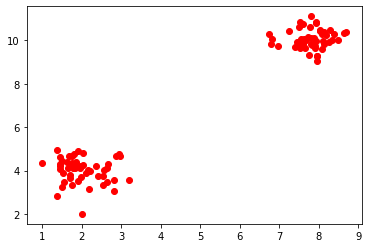

In [94]:
import matplotlib.pyplot as plt

plt.plot(df.X,df.Y,'ro')

In [95]:
number_cluster = 2

indexes = np.random.randint(0,len(dataset),number_cluster)
indexes

array([76, 22])

In [96]:
centers = np.array(dataset)[indexes]
centers

array([[7.8207, 9.8127],
       [1.5094, 4.4282]])

In [97]:
while(True):
    prev = np.array(centers)
    c = np.zeros(len(dataset))

    for i in range(len(dataset)):
        dists = []
        for j in centers:
            dist = np.linalg.norm(dataset[i]-j)
            dists.append(dist)
        c[i] = np.argmin(dists)
        
    dataset = np.array(dataset)

    for i in range(number_cluster):
        indexes = np.where(c==i)[0]
        arr = dataset[indexes]
        centers[i] = arr.mean(axis=0)
    
    if((centers-prev).mean()==0):
        break

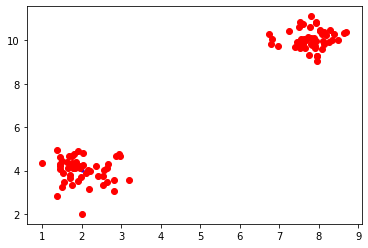

In [104]:
plt.plot(df.X,df.Y,'ro')

for i in centers:
    plt.plot(i[0],centers[0][1],'bo')